# Compressed sensing matching pursuit (CSMP) algorithms

## reference: Sergios' Machine Learning book, Sec. 10.2

In [90]:

# coding: utf-8

# # Compressed sensing matching pursuit (CSMP)
# reference: Sergios' Machine Learning book, Chapt.10
import numpy as np


def corr(x,y):
    return abs(x.dot(y))/np.sqrt((x**2).sum())

class CSMP(object):
    """ Orthogonal Matching Pursuit (OMP) algorithm class"""
    def __init__(self, k=1, t=1, err_tol=0.001, random_state=0,max_iter=100):
        self.err_tol = err_tol
        self.random_state = random_state
        self.t = t # the number of columns to consider in each iteration
        self.k =k #  the estimated vector is k sparse
        self.max_iter = max_iter
        
    def estimate(self,X,y):
        L = X.shape[1]
        theta = np.zeros(L)
        error = y
        S = [] # the support
        ii = 0

        while np.linalg.norm(error) > self.err_tol and ii < self.max_iter:
            # find the column has maximum correlation with the error
            corrs = [ corr(x,error) for x in X.T]
            # find the largets t elements
            indices = np.argpartition(corrs,-self.t)[-self.t:]
            S = np.union1d(S,indices).astype(int)
            #print(S)
            X_active = X[:,S]
            #print(X_active.shape)
            # LS estimate using active support
            theta_tilde = np.linalg.inv(X_active.T.dot(X_active)).dot(X_active.T).dot(y)
            
            ind_k = np.argpartition(abs(theta_tilde),-self.k)[-self.k:]
            # insert estimated theta into the correct location
            theta = np.zeros(L)
            theta[np.array(S)[ind_k]] = theta_tilde[ind_k]
            #print(np.array(S)[ind_k])
            #print(theta_tilde[ind_k])
            # update the error vector
            error = y-X.dot(theta)
            ii+=1
        self.theta = theta
        self.n_iters = ii
        self.errors = np.linalg.norm(error)
        return self


In [91]:

def main():
    
    L = 50 # dimension of the unknown vector w 
    k0 = 3 # assume w is k0-sparse
    w = np.zeros(L)
    rgn = np.random.RandomState(0)
    N_max = 45 # max number of sensing samples
   
    # randomly choose k0 entries, and randomly assign values
    w[rgn.randint(0,L,k0)] = rgn.normal(loc=0.0,scale=1.0,size=k0)

    csmp = CSMP(err_tol=0.001,k=k0,t=k0)
    errors = [] # trace the errors 
    start=2*k0
    for N in range(start,N_max):
        X = rgn.normal(loc=0.0,scale=1.0,size=(N,L))
        y = X.dot(w)
        csmp.estimate(X,y)
        w_hat = csmp.theta
        errors.append(np.linalg.norm(w-w_hat))
        #print(w)
        #print(w_hat)
        
    # visualize the errors
    import matplotlib.pyplot as plt
    plt.figure()
    plt.plot(np.arange(start,N_max), errors,marker='o')
    plt.ylabel('l2-norm error')
    plt.xlabel('# of samples')
    plt.title('Performance of the CSMP algorithm')
    plt.show()

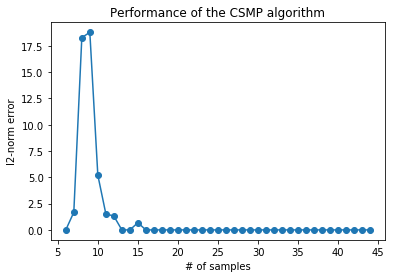

In [92]:
if __name__=='__main__':
    main()